# Text Analysis

* wordcloud 
* word count
* sentiment analysis
* topic modeling

In [142]:
%matplotlib inline                     
# import necessary packages
import pandas as pd                    
import matplotlib.pyplot as plt        
from datetime import datetime
import numpy as np
from textblob import TextBlob
import csv
import seaborn as sns #for graphing

from wordcloud import WordCloud,ImageColorGenerator

## Acquire data

In [13]:
cnn = pd.read_json('https://newsapi.org/v1/articles?source=cnn&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518')
nyt= pd.read_json('https://newsapi.org/v1/articles?source=the-new-york-times&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518')
wsp=pd.read_json('https://newsapi.org/v1/articles?source=the-washington-post&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518')
bbc=pd.read_json("https://newsapi.org/v1/articles?source=bbc-news&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518")
abc=pd.read_json("https://newsapi.org/v1/articles?source=abc-news-au&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518")
#google = pd.read_json(" https://newsapi.org/v1/articles?source=google-news&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518")
ft = pd.read_json("https://newsapi.org/v1/articles?source=financial-times&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518")
bloomberg = pd.read_json("https://newsapi.org/v1/articles?source=bloomberg&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518")
economist = pd.read_json("https://newsapi.org/v1/articles?source=the-economist&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518")
wsj = pd.read_json("https://newsapi.org/v1/articles?source=the-wall-street-journal&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518")

In [145]:
total = [wsj, cnn, nyt, wsp, bbc, abc, ft, bloomberg, economist]
total = pd.concat(total, ignore_index=True)
total.head()

,articles,sortBy,source,status
0,"{'author': 'Greg Bensinger', 'title': 'Uber CE...",top,the-wall-street-journal,ok
1,"{'author': 'Janet Hook', 'title': 'GOP’s Karen...",top,the-wall-street-journal,ok
2,"{'author': 'Nicolas Parasie', 'title': 'Saudi ...",top,the-wall-street-journal,ok
3,"{'author': 'Stephanie Yang', 'title': 'Oil Ret...",top,the-wall-street-journal,ok
4,"{'author': 'Gregor Stuart Hunter', 'title': 'C...",top,the-wall-street-journal,ok


In [149]:
#the first column in the dataframe is a dictionary
articles = total['articles']
type(articles[0])
articles[0].keys()

dict_keys(['author', 'title', 'description', 'url', 'urlToImage', 'publishedAt'])

In [151]:
# write the news posts into a new .csv file   
#with publish date, news title, description and source
#n_rows = len(tota1.index)
result = csv.writer(open('result.csv','a'))
result.writerow(['PublishedAt','Title','description','source'])
for i in range(0,n_rows): 
    line = [articles[i]['publishedAt'],articles[i]['title'],articles[i]['description'],total['source'][i]]
    result.writerow(line)

In [152]:
news=pd.read_csv('result.csv')
title=news['Title']
title.to_csv('title.csv',index=False) 

In [60]:
title.head()

0    Uber CEO Travis Kalanick Quits as Investors Re...
1    GOP’s Karen Handel Beats Democrat Jon Ossoff i...
2    Saudi King Salman Ousts Nephew as Crown Prince...
3                           Oil Returns to Bear Market
4    China Companies to Get Greater Global Scrutiny...
Name: Title, dtype: object

## Create a wordcloud for titles

In [79]:
#write the csv file into a txt file called title_text.txt
contents = csv.reader(open('title.csv','r'))
texts = open('title_text.txt','w')
list_of_text = []
for row in contents:
    line = row[0].encode('utf-8')
    line = str(line.decode())
    list_of_text.append(line)
texts.writelines(list_of_text)


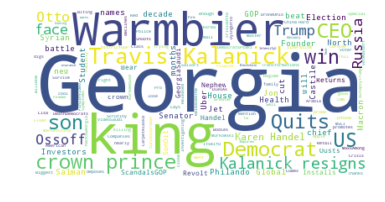

In [87]:
text=open("title_text.txt",'r')
text=text.read()
wordcloud = WordCloud().generate(text)
# increase max_font_size and change backgroud color to white 
wordcloud = WordCloud(max_font_size=40).generate(text)
wordcloud = WordCloud(max_words=200,background_color='white',max_font_size=100).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#save the wordcloud as a png file 
#plt.savefig('titles')

Below is anonther wordcloud I created using over 200,000 reviews on Airbnb for New York Manhattam area. 

As you can see, I added a background image when creating this wordcloud. 

You can do this by add two lines of code:

In [ ]:
from scipy.misc import imread
image_colors=ImageColorGenerator(imread('myfig.png'))

myfig.png is the file that you want to use as backgroung image

![image](airbnb_comments.png)

## Words Count

Clean data

* Stopping: removing meaningless words. 
Codes referred to http://www.geeksforgeeks.org/removing-stop-words-nltk-python/

* Stemming: merging words that are equivalent in meaning.


In [321]:
#remove stop words from txt file
import io
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#word_tokenize accepts a string as an input, not a file.
stop_words = set(stopwords.words('english'))
file1 = open("title_text.txt")
line = file1.read()# Use this to read file content as a stream:
words = line.split()
for r in words:
    if not r in stop_words:
        appendFile = open('title_clean.txt','a') #store the cleaned version as title_clean.tet
        appendFile.write(" "+r)
        appendFile.close()

In [322]:
import re
from collections import Counter

with open('title_clean.txt') as f:
    passage = f.read()

words = re.findall(r'\w+', passage)

lower_words = [word.lower() for word in words]

In [323]:
#merging words that are equivalent in meaning.
from nltk.stem.porter import PorterStemmer
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
clean_title= [p_stemmer.stem(i) for i in lower_words]

In [324]:
word_counts = Counter(clean_title)

In [325]:
df = pd.DataFrame.from_dict(word_counts, orient='index')

In [326]:
df.sort_values([0], ascending=False).head(15)

,0
s,19
georgia,9
kalanick,7
warmbier,6
t,6
king,6
travi,5
crown,5
democrat,4
resign,4


We can see that there are still some meaningless words, like 's', 't' and 'a', that haven't been removed sine they are not in the stop words list. Therefore, I'm going to add these words in my stop_words list.

In [327]:
#stopWords = set(stopwords.words('english'))
my_additional_stop_words = word_tokenize('s t a')
#more_stopwords=stop_words.append(words)

from sklearn.feature_extraction import text 

stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)


In [328]:
stop_words

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [329]:
file1 = open("title_text.txt")
line = file1.read()# Use this to read file content as a stream:
words = line.split()
for r in words:
    if not r in stop_words:
        appendFile = open('title_clean1.txt','a') #store the cleaned version as title_clean.tet
        appendFile.write(" "+r)
        appendFile.close()

In [330]:
with open('title_clean1.txt') as f:
    passage = f.read()

words = re.findall(r'\w+', passage)

lower_words = [word.lower() for word in words]

word_counts = Counter(lower_words)

In [331]:
df = pd.DataFrame.from_dict(word_counts, orient='index')

In [309]:
df.sort_values([0], ascending=False).head(15)

,0
s,19
georgia,9
kalanick,7
warmbier,6
t,6
king,6
travis,5
crown,5
resigns,4
son,4


This doesn't seem to work. I'm confused...

## Sentiment Analysis

In [153]:
news.head()

,PublishedAt,Title,description,source
0,2017-06-21T05:39:00Z,Uber CEO Travis Kalanick Quits as Investors Re...,Uber Chief Executive Travis Kalanick has resig...,the-wall-street-journal
1,2017-06-21T02:14:00Z,GOP’s Karen Handel Beats Democrat Jon Ossoff i...,Republicans held on to a hotly contested U.S. ...,the-wall-street-journal
2,2017-06-21T04:15:00Z,Saudi King Salman Ousts Nephew as Crown Prince...,King Salman named his son as the country’s new...,the-wall-street-journal
3,2017-06-20T23:39:00Z,Oil Returns to Bear Market,"Oil prices are back in bear-market territory, ...",the-wall-street-journal
4,2017-06-21T05:00:00Z,China Companies to Get Greater Global Scrutiny...,The index provider’s decision to include mainl...,the-wall-street-journal


In [154]:
#create a new column called title_sentitment for each title in dataframe news
#which measures how positive or negative the title is 
#the score ranges from -1 to 1. 1 means extremely positive and 0 means neatural
def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

news['title_polarity'] = news['Title'].apply(sentiment_calc)

In [155]:
#create a new column called title_sub for each title in dataframe news
#which measures how subjective or objective the title is 
#the score ranges from -1 to 1. 1 means extremely subjective and 0 means neatural
def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment.subjectivity
    except:
        return None

news['title_sub'] = news['Title'].apply(sentiment_calc)

In [156]:
news.tail()

,PublishedAt,Title,description,source,title_polarity,title_sub
159,NaN,Cadmium case proves toxic for Barclays,NaN,financial-times,0.3,0.00
160,NaN,Central bank policy talk puts investors on notice,NaN,financial-times,0.0,0.25
161,2017-06-21T03:57:42.113Z,Saudi King Names His Son as Heir to Throne in ...,Saudi Arabia’s Deputy Crown Prince Mohammed Bi...,bloomberg,0.0,0.00
162,2017-06-21T05:30:17.303Z,Uber CEO Travis Kalanick Quits Under Pressure ...,Uber Technologies Inc. Chief Executive Officer...,bloomberg,0.0,0.00
163,2017-06-21T02:25:54.135Z,"Republican Handel Wins Georgia House Election,...",Republican Karen Handel defeated a well-funded...,bloomberg,0.3,0.20


In [181]:
news[news['source']=='source']['source']

Series([], Name: source, dtype: object)

In [180]:
#since there's a row whose source is labelled as source, I drop that row by doing this 
news=news[~news.source.isin(['source'])]

In [183]:
news['title_polarity'].describe()

count    163.000000
mean       0.054725
std        0.198424
min       -1.000000
25%        0.000000
50%        0.000000
75%        0.046591
max        0.800000
Name: title_polarity, dtype: float64

* Compare mean subjectivity among different news press

In [184]:
polarity_mean=news.groupby('source',as_index=False)['title_polarity'].mean()

In [185]:
print(polarity_mean)

                    source  title_polarity
0              abc-news-au        0.093636
1                 bbc-news        0.038636
2                bloomberg        0.051399
3                      cnn        0.278571
4          financial-times        0.060000
5            the-economist       -0.011310
6       the-new-york-times        0.015714
7  the-wall-street-journal       -0.028056
8      the-washington-post       -0.040253


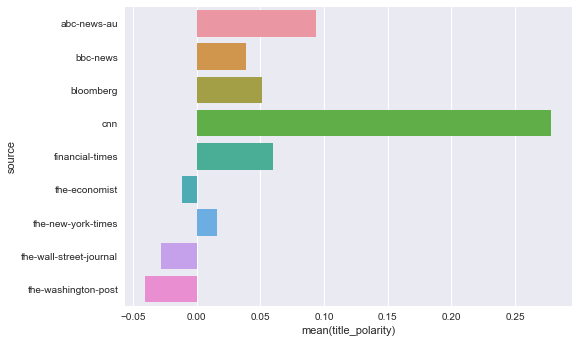

In [186]:
ax = sns.barplot(x="title_polarity", y="source", data=polarity_mean)

* Compare mean subjectivity among different news press

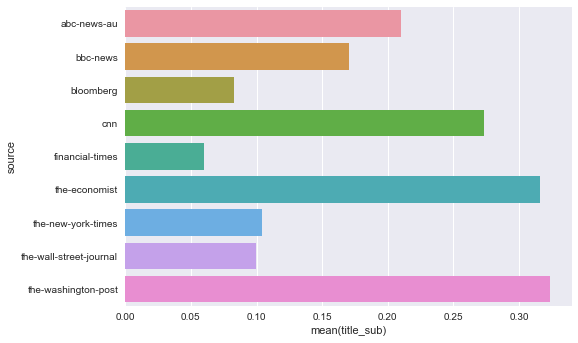

In [187]:
sub_mean=news.groupby('source',as_index=False)['title_sub'].mean()
ax = sns.barplot(x="title_sub", y="source", data=sub_mean)

## Topic Modeling 

For topic modeling, I'm going to use a package called Gensim, which is most commonly used for topic modeling and similarity detection.

Codes referred to https://rstudio-pubs-static.s3.amazonaws.com/79360_850b2a69980c4488b1db95987a24867a.html

In [334]:
type(clean_title)

list

In [336]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
stop_words = set(stopwords.words('english'))

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
stop_words = set(stopwords.words('english'))

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

In [344]:
# list for tokenized documents in loop
texts = []

# loop through document list
for i in clean_title:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in stop_words]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

In [345]:
# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word = dictionary, passes=20)

In [346]:
print(ldamodel.print_topics(num_topics=3, num_words=4))

[(0, '0.031*"georgia" + 0.025*"kalanick" + 0.021*"warmbier" + 0.021*"king"'), (1, '0.020*"travi" + 0.020*"crown" + 0.016*"ceo" + 0.016*"win"'), (2, '0.016*"princ" + 0.016*"resign" + 0.012*"karen" + 0.012*"face"')]


** Interpretation**

lda.printTopics(k) prints the most contributing words for k *randomly* selected topics. One can assume that this is (partially) the distribution of words over each of the given topics, meaning the probability of those words appearing in the topic to the left.

Since the data set we usse is relatively small, running LDA on a small sample won't give the best results.

The purpose of doing LDA here is just to give myself a sense of how to conducting LDA analysis in python. 


Below are some topics I generated using Airbnb's comments. 

![image.png](airbnb_topic.png)

![image.png](airbnb_topic2.png)